<a href="https://colab.research.google.com/github/joaochenriques/WaveEnergyStatistics/blob/main/IDMEC/WaveEnergyStatistics_2018_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wave energy statistics from 2019 to 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mpl
import sys, pathlib
import itertools
from scipy import optimize
from sortedcontainers import SortedDict, SortedSet
from collections import OrderedDict

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

import pathlib, subprocess

def cmdcall( cmd ):
    output = subprocess.getoutput( cmd )
    print(output)

if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( 'curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py' )

import mpl_utils as mut
mut.config_plots()

markers = ( 'o', '^', 's', 'v', 'H', 'X', 'P' )

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3921  100  3921    0     0  18304      0 --:--:-- --:--:-- --:--:-- 18408


In [2]:
cmdcall( 'wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf' )
matplotlib.font_manager.fontManager.addfont('Roboto-Regular.ttf')
# import matplotlib.font_manager
# for f in matplotlib.font_manager.fontManager.ttflist:
#     print(f.name)

--2024-06-10 21:07:20--  https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf [following]
--2024-06-10 21:07:20--  https://raw.githubusercontent.com/MaxGhenis/random/master/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145348 (142K) [application/octet-stream]
Saving to: ‘Roboto-Regular.ttf’

     0K .......... .......... .......... .......... .......... 35% 28.8M 0s
    50K .......... .......... .......... .......... .......... 70% 22.7M 0s
   100K .......... .......... ..

In [3]:
cmdcall( 'pip install pylatex' )
from pylatex import LongTable, Tabular, MultiColumn, MultiRow, TextColor
from pylatex.utils import bold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pylatex: filename=PyLaTeX-1.4.2-py3-none-any.whl size=43562 sha256=02dbbaa6f99696700d021a64a28c17c44f039c6e9043802cffc3540733f92d63
  Stored in directory: /root/.cache/pip/wheels/a3/60/09/c6f9f98feac18da1b5fc02bd765c6b3cb9a0f75955a12b27ad
Successfully built pylatex


In [4]:
cmdcall( 'pip install font-roboto' )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for font-roboto: filename=font_roboto-0.0.1-py3-none-any.whl size=2359737 sha256=6ac80291a2063a124459fa4b6c642b549392d25b827642a65f2d6dc3fe0f9578
  Stored in directory: /root/.cache/pip/wheels/a3/9e/ce/7bf12c0d9d2b230d1457d6b7c776aabdc6a01e9ab824db2462
Successfully built font-roboto


In [5]:
cmdcall( 'pip install unidecode' )
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.2 MB/s eta 0:00:00


In [6]:
cmdcall( 'pip install dataclassy' )
from dataclassy import dataclass

In [7]:
SCOPUS_query = \
'''
PUBYEAR > 2017 AND DOCTYPE ( ar OR re ) AND (
    LIMIT-TO ( PREFNAMEAUID , "Henriques, J.C.C.#36173947400" ) OR
    LIMIT-TO ( PREFNAMEAUID , "Gato, L.M.C.#7004360885" ) OR
    LIMIT-TO ( PREFNAMEAUID , "Gomes, R.P.F.#26030969000" ) )
'''

In [8]:
filename = 'scimagojr_2023.csv'

if not pathlib.Path( f"{filename}").exists():
   cmdcall( f'curl -O https://raw.githubusercontent.com/joaochenriques/PAS_STATS/main/{filename}' )

df_Q = pd.read_csv( filename, sep=";" )

df_Q.keys()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8867k  100 8867k    0     0  19.0M      0 --:--:-- --:--:-- --:--:-- 19.0M


Index(['Rank', 'Sourceid', 'Title', 'Type', 'Issn', 'SJR', 'SJR Best Quartile',
       'H index', 'Total Docs. (2023)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', '%Female', 'Overton', 'SDG',
       'Country', 'Region', 'Publisher', 'Coverage', 'Categories', 'Areas'],
      dtype='object')

In [9]:
filename = 'scopus_IDMEC_2018_2023.csv'

if not pathlib.Path( f"{filename}").exists():
    cmdcall( f'curl -O https://raw.githubusercontent.com/joaochenriques/PAS_STATS/main/IDMEC/{filename}' )

df = pd.read_csv( filename )

df.keys()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 80937  100 80937    0     0   401k      0 --:--:-- --:--:-- --:--:--  403k


Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Correspondence Address', 'Publisher',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [10]:
DB_journals_lwr = SortedDict()

for journal in df['Source title']:
    DB_journals_lwr[ journal.lower() ] = 0

for journal in DB_journals_lwr:
    print( journal )

applied energy
applied ocean research
energy
energy conversion and management
energy conversion and management: x
ieee transactions on sustainable energy
iet renewable power generation
international marine energy journal
journal of marine science and engineering
journal of ocean engineering and marine energy
nonlinear dynamics
ocean engineering
renewable and sustainable energy reviews
renewable energy


In [11]:
@dataclass
class Jdata:
    Title: str
    Quartil: str
    num: int

Journal_data = SortedDict()
Pubs_Quartil = SortedDict( {'Q1':0, 'Q2':0, 'Q3':0 })

for n, ( _journal, Qn ) in enumerate( zip( df_Q['Title'], df_Q['SJR Best Quartile'] ) ):
    Q_journal = _journal.lower()
    for DB_journal in DB_journals_lwr:
        if Q_journal.lower() == DB_journal:
            Journal_data[ Q_journal ] = Jdata( _journal, Qn, 0 )

for journal in df['Source title']:
    Journal_data[ journal.lower() ].num += 1

for journal in Journal_data.values():
    print( f'{journal.Quartil} | {journal.num:2d} -> {journal.Title}' )
    Pubs_Quartil[journal.Quartil] += journal.num

Pubs_Quartil

Q1 |  5 -> Applied Energy
Q1 |  2 -> Applied Ocean Research
Q1 | 10 -> Energy
Q1 |  5 -> Energy Conversion and Management
Q1 |  2 -> Energy Conversion and Management: X
Q1 |  1 -> IEEE Transactions on Sustainable Energy
Q2 |  2 -> IET Renewable Power Generation
Q3 |  1 -> International Marine Energy Journal
Q2 |  1 -> Journal of Marine Science and Engineering
Q2 |  1 -> Journal of Ocean Engineering and Marine Energy
Q1 |  1 -> Nonlinear Dynamics
Q1 |  1 -> Ocean Engineering
Q1 |  8 -> Renewable and Sustainable Energy Reviews
Q1 | 10 -> Renewable Energy


SortedDict({'Q1': 45, 'Q2': 4, 'Q3': 1})

In [12]:
@dataclass
class data_IDMEC:
    num_papers: int = 0
    citations: OrderedDict = OrderedDict( { y:0 for y in range(2018, 2024 ) } )
    year: OrderedDict = OrderedDict( { y:0 for y in range(2018, 2024 ) } )

data_summary = data_IDMEC()

for year, citations in zip( df['Year'], df['Cited by'] ):
    if year == 2024: continue
    data_summary.year[year] += 1
    data_summary.citations[year] += int(citations)

sum( data_summary.year.values() )

50

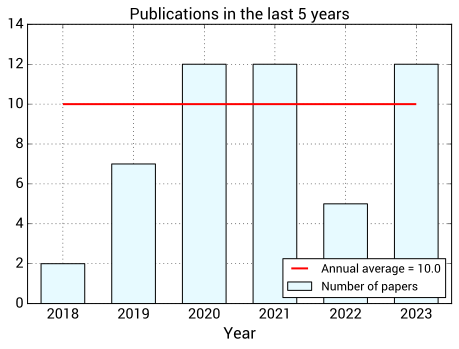

In [57]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.year.items()))
media = sum( data_summary.year.values() ) / 5

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.hlines( media, 2018, 2023, color='r', lw=2, label=f"Annual average = {media:.1f}" )

mpl.gca().bar( year_dic.keys(), year_dic.values(), width=0.618, color='#e7faff', label='Number of papers', alpha=1 )

mpl.grid()
mpl.xlabel( 'Year' )
mpl.title( "Publications in the last 5 years" )
mpl.gca().set_axisbelow(True)
mpl.xlim( (2018-0.5, 2023+.5) )
mpl.ylim( (0, 14) )
mpl.legend(loc='lower right', fontsize=12 )
mpl.gca().set_xticks( range( 2018, 2023+1, 1 ) );
mpl.savefig( 'IDMEC_PubsLast5Years.svg', bbox_inches='tight', pad_inches=0.02 )

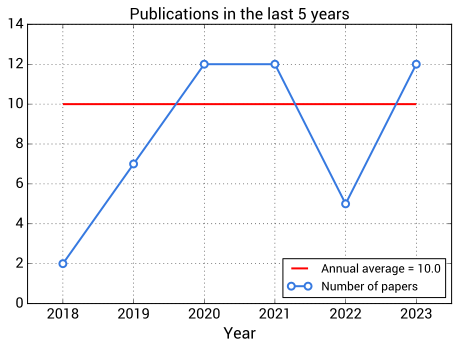

In [58]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.year.items()))
media = sum( data_summary.year.values() ) / 5

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.hlines( media, 2018, 2023, color='r', lw=2, label=f"Annual average = {media:.1f}" )

mpl.plot( year_dic.keys(), year_dic.values(), 'o-',
         linewidth=2, color='#3679e0',
         markersize=7, markerfacecolor='w', markeredgewidth=2,
         markeredgecolor='#3679e0', label='Number of papers' )

mpl.grid()
mpl.xlabel( 'Year' )
# mpl.ylabel( 'Número of papers' )
mpl.title( "Publications in the last 5 years" )
mpl.gca().set_axisbelow(True)
mpl.xlim( (2018-0.5, 2023+.5) )
mpl.ylim( (0, 14) )
mpl.legend(loc='lower right', fontsize=12 )
mpl.gca().set_xticks( range( 2018, 2023+1, 1 ) );
mpl.savefig( 'IDMEC_PubsLast5Years_Lines.svg', bbox_inches='tight', pad_inches=0.02 )

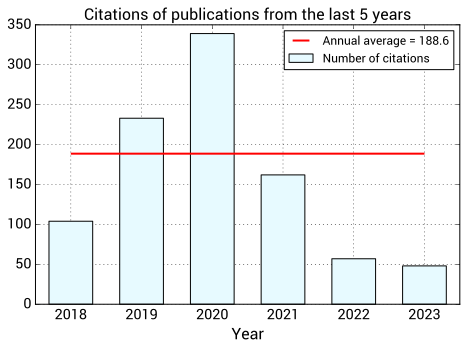

In [59]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.citations.items()))
media = sum( data_summary.citations.values() ) / 5.0

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.gca().bar( year_dic.keys(), year_dic.values(), width=0.618, color='#e7faff', label='Number of citations', alpha=1 )

mpl.hlines( media, 2018, 2023, lw=2, color='r', label=f"Annual average = {media:.1f}" )
mpl.xlim( (2018-0.5, 2023+.5) )
mpl.ylim( (0, 350) )
mpl.legend(loc='upper right', fontsize=12 )
mpl.gca().grid()
mpl.gca().set_axisbelow(True)
mpl.xlabel( 'Year' )
mpl.title( "Citations of publications from the last 5 years" )
mpl.savefig( 'IDMEC_Citations_PubsLast5Years.svg', bbox_inches='tight', pad_inches=0.02 )

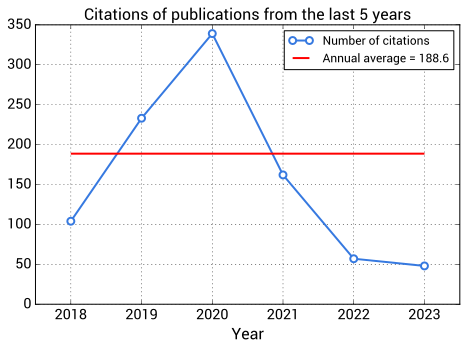

In [61]:
mpl.rc('font', family='Roboto')

year_dic =  OrderedDict(sorted(data_summary.citations.items()))
media = sum( data_summary.citations.values() ) / 5.0

mpl.figure( 1, figsize=(1.2*6,1.2*4) )
mpl.plot( year_dic.keys(), year_dic.values(), 'o-',
         linewidth=2, color='#3679e0',
         markersize=7, markerfacecolor='w', markeredgewidth=2,
         markeredgecolor='#3679e0', label='Number of citations' )

mpl.hlines( media, 2018, 2023, lw=2, color='r', label=f"Annual average = {media:.1f}" )
mpl.xlim( (2018-0.5, 2023+.5) )
mpl.ylim( (0, 350) )
mpl.legend(loc='upper right', fontsize=12 )
mpl.gca().grid()
mpl.gca().set_axisbelow(True)
mpl.xlabel( 'Year' )
mpl.title( "Citations of publications from the last 5 years" )
mpl.savefig( 'IDMEC_Citations_PubsLast5Years_Lines.svg', bbox_inches='tight', pad_inches=0.02 )
